In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pydataset import data
import statistics

## Hypothesis Testing Exercises (May 7th)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

#### #1. Has the network latency gone up since we switched internet service providers?
- $H_{0}$: there is no change to network latency since switching providers
- $H_{a}$: there is a change in network latency since switching providers
- True Positive: I reject the $H_{0}$, and the network latency has chanced since switching providers
- True Negative: I fail to reject the $H_{0}$, and the network latency has not chanced since switching providers
- Type I error: I reject the $H_{0}$, but switching provides does not change network latency
- Type II error: I fail to reject the $H_{0}$, but switching provides does change network latency

#### #2. Is the website redesign any good?
- $H_{0}$: the website redesign has caused no change in revenue
- $H_{a}$: the website redesign has caused revenue to increase significantly
- True Positive: I reject the $H_{0}$, and the web redesign does change revenue
- True Negative: I fail to reject the $H_{0}$, and web redesign do not change revenue
- Type I error: I reject the $H_{0}$,but web redesign do not change revenue
- Type II error: I fail to reject the $H_{0}$, but web redesign do change revenue

#### #3. Is our television ad driving more sales?
- $H_{0}$: the television ad is not driving more sales 
- $H_{a}$: the television ad does drive more sales
- True Positive: I reject the $H_{0}$, and the television ads do drive sales
- True Negative: I fail to reject the $H_{0}$, and television ads do not drive more sales
- Type I error: I reject the $H_{0}$,but television ads do not drive sales
- Type II error: I fail to reject the $H_{0}$, but television ads do drive sales

_____

# EXERCISES: T-TEST (May 10)

1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

2) Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    b. Are compact cars more fuel-efficient than the average car?
    c. Do manual cars get better gas mileage than automatic cars?

#### #1 Ace Realty

- compare average time selling homes is different at 2 offices
- office 1: sample size = 40, mean= 90, stddev = 15
- office 2: sample size= 50, mean= 100, stddev = 20
- alpha = .05

##### first, see what kinds of data you're comparing. 
- average time (numeric/continious) vs two offices (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [ ]:
# this will be:
# a 2 sample t-test- comparing two offices
# a 2 tailed- want to know if the average is larger OR smaller in either office

#### Step 1: plot distribution

In [ ]:
x= np.arange(40,160)

#y=stats.norm(mean, stddev).pdf(x)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90)
plt.axvline(100, color='orange')

plt.legend()

In [ ]:
avg_y1 = np.mean(y1)
avg_y1

In [ ]:
avg_y2= np.mean(y2)
avg_y2

#### Step 2: Set Hypothesis

- $H_0$: There is no diffence in mean selling time between the two offices
- $H_a$: There is a diffence in mean selling time between the two offices   

#### Step 3: Set Alpha

In [ ]:
alpha = .05

#### Step 4: Verify Assumption
- samples are independent = YES, two seperate data sets
- normal distribution = YES, sample sizes are 50 and 40
- equal variance = False

In [ ]:
y1.var(), y2.var()
#this shows the variance is not the same. must set variance to false

#### Step 5: Compute Test Statistics

In [ ]:
# 2 sample. 2 tailed

In [ ]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100,20, 50, equal_var=False)
t, p, alpha

In [ ]:
p < alpha

#### Step 6: Decide

In [ ]:
print('''
because the p-value is less than alpha value, we reject null hypthosis''')

we reject our $H_0$, there is a difference in average selling time between the two offices.

______________________________________________________

#### 2) Load the mpg dataset 

In [ ]:
mpg = data('mpg')

In [ ]:
mpg.head()
#get a sneakpeek

In [ ]:
mpg.info()

### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two years (distinct/categorical)


In [ ]:
# find average between city and hwy mileage for each year

### harmonic mean:
    - fe_hm= 2/(1/cty +1/hwy)
    - use for mpg, mph in two values
### arithmetic mean: 
    - fe_am = (cty +hwy)/2

In [ ]:
mpg['average_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()
#use this code to find the mean of cty and hwy combined and create a 

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [ ]:
# this will be:
# a 2 sample t-test- comparing two years
# a 2 tailed- wants the difference, not if one is less or more

In [ ]:
#create new panda series
ninenine_fuel = mpg[mpg.year == 1999].average_mpg
oeight_fuel = mpg[mpg.year == 2008].average_mpg

#### Step 1: plot distribution

In [ ]:
ninenine_fuel.hist()

In [ ]:
oeight_fuel.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

#### Step 3: Set Alpha

In [ ]:
alpha = .05

#### Step 4: Verify Assumption

- samples are independent = YES, two seperate data sets
- normal distribution = Not normal BUT there are more than 30 sample size
- equal variance = False

In [ ]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

In [ ]:
#to find variance
ninenine_fuel.var(), oeight_fuel.var()

#### Step 5: Compute Test Statistics

In [ ]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel, equal_var=False)

In [ ]:
t,p,alpha

In [ ]:
p < alpha

#### Step 6: Decide

- Because p > α, we fail to reject our $H_0$. There is no difference in fuel-economy between 1999 and 2008 vehicles

In [ ]:
## just look at the means to visually confirm your decision
ninenine_fuel.mean(), oeight_fuel.mean()

___________________________________________________________

### b. Are compact cars more fuel-efficient than the average car?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two car types (distinct/categorical)

In [ ]:
fuel_compact = mpg[mpg['class'] == 'compact'].average_mpg
μ = mpg.average_mpg.mean()
#create new panda series with column of compact car average mpg

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- one tailed or 2 tailed?

In [ ]:
#this is:
# one sample- only looking at compact cars average
# one tailed- MORE fuel efficient, not is there a difference in fuel

#### Step 1: plot distribution

In [ ]:
fuel_compact.hist()

In [ ]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t, p

#### Step 2: Set Hypothesis
- $H_0$: there is no between compact car fuel-efficiency and the average fuel efficiency
- $H_a$: there is a between compact car fuel-efficiency and the average fuel efficiency

#### Step 3: Set alpha

In [ ]:
alpha = .05

#### Step 4: Verify Assumptions
- normal distribution = YES


In [ ]:
fuel_compact.count()
#must be more than 30

#### Step 5: Compute Test Statistics

In [ ]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t,p

#### Step 6: Decide

In [ ]:
p/2 < alpha

Because p/2 < α, we accept our $H_0$. Compact cars are more fuel efficient

________________________________________________________

### c. Do manual cars get better gas mileage than automatic cars?

##### first, see what kinds of data you're comparing. 
- fuel economy (numeric/continious) vs car type (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [ ]:
# this will be:
#     1 tail- wants to know if gas mileage is better
#     2 sample t-test

In [ ]:
#create two new datasets 
fuel_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fuel_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

#### Step 1: plot distribution

In [ ]:
fuel_auto.hist()

In [ ]:
fuel_manual.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no between automatic and manual fuel efficiency
- $H_a$: there is a between automatic and manual fuel efficiency

#### Step 3: Set alpha

In [ ]:
alpha = .05

#### Step 4: Verify Assumptions

- samples are independent = YES, two seperate data sets
- normal distribution = Yes and sample size greater than 30
- equal variance = False

In [ ]:
fuel_auto.count(), fuel_manual.count()
#check sample size, must be more than 30

In [ ]:
fuel_auto.var(), fuel_manual.var()
#check variance

#### Step 5: Compute Statistical Test

In [ ]:
t, p = stats.ttest_ind(fuel_manual, fuel_auto, equal_var = False)
#because it is a 2 sample test, must use ttest_ind
t,p, alpha

#### Step 6: Decide

In [ ]:
p/2 < alpha
#because it is a one-tailed test, must divide p by 2

Because p/2 < alpha, we reject the null hypthosis that there is no difference in gas milage between manual and auto cars

In [ ]:
## just look at the means to visually confirm your decision
fuel_manual.mean(), fuel_auto.mean()

#### ^-- 21.69 is not the same as 18.58 SO... the null that there is NO difference in fuel economy is rejected

________

# EXERCISES: Correlation Tests (May 11)

1. Use the telco_churn data. 
- a. Does tenure correlate with monthly charges? 
- b. Total charges? 
- c. What happens if you control for phone and internet service?

2. Use the employees database.
- a. Is there a relationship between how long an employee has been with the company and their salary?
- b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. 
- a. Is there a relationship between days and reaction time?

#### #1 Use the telco_churn data.

In [ ]:
df = pd.read_csv('Cust_Churn_Telco.csv')

In [ ]:
# Clean the data
df.TotalCharges.replace(" ", np.nan, inplace = True)
df.dropna(inplace = True)
df.sort_values("TotalCharges")

In [ ]:
df.head()

#### 1a. Does tenure correlate with monthly charges?

In [ ]:
x = df.tenure
y= df.MonthlyCharges

#number of rows
n = df.shape[0] 

#degrees of freedom- how much the data can vary
deg_f = n-2 

#confidence interval (!)
conf_in = 0.95

alpha = 1- conf_in

In [ ]:
plt.scatter(x,y)

In [ ]:
r, p = stats.pearsonr(x,y)
r, p

In [ ]:
print(f'We calcaulate a pearson r of {r:3f} and a statistical certainty p of {p:4f}')

In [ ]:
p<alpha

$H_0$: There is no linear correlation between the Monthly charges and tenure

##### Conclusion: there is a low positive correlation. Because p <α, we reject our $H_0$

#### 1b. Does tenure correlate with total charges?

In [ ]:
x= df.tenure
y= df.TotalCharges.astype(float)

In [ ]:
plt.scatter(x,y)

In [ ]:
r, p = stats.pearsonr(x,y)
r, p

In [ ]:
p<alpha

$H_0$: There is no linear correlation between the total charges and tenure

##### Conclusion: there is a positive correlation. Because p <α, we reject our $H_0$

#### 1c. What happens if you control for phone and internet service?

In [ ]:
#exlude phone
phone = df[df.PhoneService == 'No']
phone.head()

In [ ]:
x=phone.tenure
monthly_charges = phone.MonthlyCharges
total_charges = phone.TotalCharges.astype(float) #must change data type

In [ ]:
#plot correlation between monthly charges and phone service
plt.scatter(x,monthly_charges)

In [ ]:
r,p= stats.pearsonr(x, monthly_charges)
r,p

In [ ]:
p<alpha

$H_0$: There is no linear correlation between the monthly charges and phone service
    
##### Conclusion: there is a low positive correlation. Because p <α, we reject our $H_0$ 

In [ ]:
#plot correlation between total charges and phone service
plt.scatter(x,total_charges)

In [ ]:
r,p= stats.pearsonr(x, total_charges)
r,p

In [ ]:
p<alpha

$H_0$: There is no linear correlation between the total charges and phone service
    
##### Conclusion: there is a strong positive correlation. Because p <α, we reject our $H_0$ 

In [ ]:
#create variable for internet
internet = df[df.InternetService == "No"]
internet

In [ ]:
#rename x
x = internet.tenure

In [ ]:
monthly_charges = internet.MonthlyCharges
total_charges = internet.TotalCharges.astype(float)

In [ ]:
#monthly internet
r,p= stats.pearsonr(x, monthly_charges)
r,p

In [ ]:
plt.scatter(x,monthly_charges)

In [ ]:
p<alpha

$H_0$: There is no linear correlation between the monthly charges and internet service
    
##### Conclusion: there is no  correlation. Because p <α, we reject our $H_0$ 

#total internet
r,p= stats.pearsonr(x, total_charges)
r,p

In [ ]:
plt.scatter(x,total_charges)

In [ ]:
p <alpha

$H_0$: There is no linear correlation between the total charges and internet service
    
##### Conclusion: there is a strong positive correlation. Because p <α, we reject our $H_0$ 

______________________________________

#### #2 Use the employees database.

### Step1: Set up the environment 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env import host, user, password

## Step 2: Set up database

In [ ]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

## Step 3: Set up queries and get connection

In [ ]:
employees_df = pd.read_sql('SELECT * from employees', url)
employees_df.head()

In [ ]:
salaries_df = pd.read_sql('SELECT * from salaries', url)
salaries_df.head()

In [ ]:
titles_df = pd.read_sql('SELECT * from titles', url)
titles_df.head()

## Step 4: Aggregate title by employee number

In [ ]:
countref= titles_df.groupby('emp_no').count()[['title']].rename(columns={'title':'titlecount'})

In [ ]:
## Step 5: Join to titles

In [ ]:
merged =pd.merge(titles_df, countref, how='left', on='emp_no')

In [ ]:
merged.head()

In [ ]:
merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now()) if str(x).startswith('9999') else pd.to_datetime(x)

In [ ]:
merged['from_date'] = merged['from_date'].apply(lambda x: pd.datetime.now()) if str(x).startswith('9999') else pd.to_datetime(x)

In [ ]:
#merged['tenure'] = (merged.to_date - merged.from_date).astype(int)

In [ ]:
#convert timedelta calculated difference in days, first to string, then replace days with nothing, and convert to int
#df_emp2['tenure'].astype('str').str.replace(' days', '').astype('int')

#### 2a. Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
merged = pd.merge(titles_df, salaries_df, how = 'left', on= 'to_date')

In [ ]:
merged.head()

#### 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

_____________________________________

#### #3. Use the sleepstudy data.

In [2]:
sleepstudy = data('sleepstudy')

In [3]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [4]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


#### 3a. Is there a relationship between days and reaction time?

In [5]:
#give values to x and y
x= sleepstudy.Days
y= sleepstudy.Reaction
alpha= 0.5

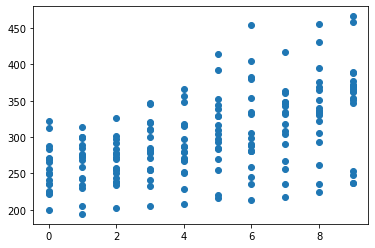

In [6]:
plt.scatter(x,y)

In [12]:
r, p = stats.pearsonr(x,y)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [ ]:
p<alpha

$H_0$: There is no linear correlation between days and reaction time
    
##### Conclusion: there is a positive correlation. Because p <α, we reject our $H_0$ 

_________________________________

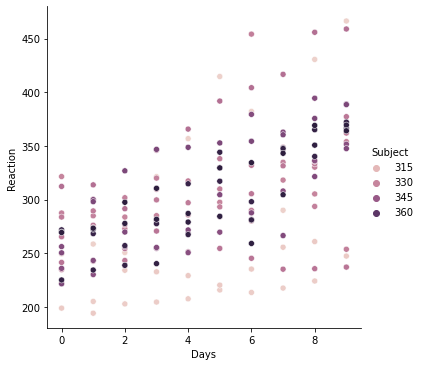

In [11]:
# graph in seaborn

sns.relplot(x='Days', y= 'Reaction', hue='Subject', data=sleepstudy)

In [13]:
## seperate like with Telco

In [16]:
subjects= {}
for subject in sleepstudy['Subject'].unique():
    subjects[subject] = {}
    subjects[subject]['Days'] = sleepstudy['Days'][sleepstudy['Subject'] == subject]
    subjects[subject]['Reaction'] = sleepstudy['Reaction'][sleepstudy['Subject'] == subject]

In [17]:
subjects.keys()

dict_keys([308, 309, 310, 330, 331, 332, 333, 334, 335, 337, 349, 350, 351, 352, 369, 370, 371, 372])

In [18]:
subjects[308].keys()

dict_keys(['Days', 'Reaction'])

In [19]:
subjects[308]['Days']

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
Name: Days, dtype: int64

In [20]:
for subject in subjects:
    r,p = stats.pearsonr(subjects[subject]['Days'], subjects[subject]['Reaction'])


__________

# Exercises: ChiSquared Test (May 11)

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
from env import host, user, password

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

3. Use the data from the employees database to answer these questions:
- a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- b. Is an employee's gender independent of whether or not they are or have been a manager?

### 1 Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

- $H_0$: There is no association between using a macbook and being a Codeup student (independence)
- $H_a$: There is an association between using a macbook and being a Codeup student (dependent)

In [23]:
# set alpha and confidence
conf_inter = 0.95
alpha = 1- conf_inter

In [26]:
#create table with image (table) already given
contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup': [20,30]}, index=['uses_macbook', 'not_macbook'])

In [31]:
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [104]:
#chi2 test
chi2, p, degf, expected = stats.chi2_contingency(contingency)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [105]:
## make it easier to read
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.8f}')

Observed

[[ 8037 14999]
 [12174 22702]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.00000000


In [102]:
#conclusion
p <alpha

False

In [107]:
if p< alpha:
    print('Our p-value is less than α, we reject the null hypothesis')
else:
    print('Our p-value is greater than α, we fail to reject the null hypothesis')

Our p-value is less than α, we reject the null hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [38]:
mpg =data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [109]:
#Dtype tells you what is categorical (object) or continuous (float)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [59]:
# create your hypothesis

- $H_0$: There is no association between manufacturer and drive type (independence)
- $H_a$: There is an association between manufacturer and drive type (dependent)

In [48]:
#get value count to make sure there are at least 30 values
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [49]:
#get value count to make sure there are at least 30 values
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [52]:
observed = pd.crosstab(mpg.manufacturer, mpg.drv)
observed

drv,4,f,r
manufacturer,,,
audi,11,7,0
chevrolet,4,5,10
dodge,26,11,0
ford,13,0,12
honda,0,9,0
hyundai,0,14,0
jeep,8,0,0
land rover,4,0,0
lincoln,0,0,3


In [53]:
#to drop nan/null
mpg = mpg.dropna()

In [54]:
#chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(232.03448840753833,
 5.12809407673465e-34,
 28,
 array([[ 7.92307692,  8.15384615,  1.92307692],
        [ 8.36324786,  8.60683761,  2.02991453],
        [16.28632479, 16.76068376,  3.95299145],
        [11.0042735 , 11.32478632,  2.67094017],
        [ 3.96153846,  4.07692308,  0.96153846],
        [ 6.16239316,  6.34188034,  1.4957265 ],
        [ 3.52136752,  3.62393162,  0.85470085],
        [ 1.76068376,  1.81196581,  0.42735043],
        [ 1.32051282,  1.35897436,  0.32051282],
        [ 1.76068376,  1.81196581,  0.42735043],
        [ 5.72222222,  5.88888889,  1.38888889],
        [ 2.2008547 ,  2.26495726,  0.53418803],
        [ 6.16239316,  6.34188034,  1.4957265 ],
        [14.96581197, 15.4017094 ,  3.63247863],
        [11.88461538, 12.23076923,  2.88461538]]))

In [111]:
#make it easier to read
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.8f}')

Observed

[[ 8037 14999]
 [12174 22702]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.00000000


In [112]:
#set alpha and confidence interval
conf_inter = 0.95
alpha = 1- conf_inter

In [57]:
#get conclusion
p<alpha

True

In [110]:
if p< alpha:
    print('Our p-value is less than our alpha, we reject the null hypothesis')
else:
    print('Our p-value is greater than our alpha, we fail to reject the null hypothesis')

Our p-value is less than our alpha, we reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:

In [62]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'    

In [63]:
#import employees 
employees_df = pd.read_sql('SELECT * from employees', url)
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [64]:
#import departments
departments_df = pd.read_sql('SELECT * from departments', url)
departments_df.head()

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [ ]:
#join departments and employees

In [91]:
query = '''SELECT *
FROM employees
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE to_date > now()
AND dept_name LIKE 'sales'
OR dept_name LIKE 'marketing';'''

In [92]:
join_dept_gender = pd.read_sql(query, url )
join_dept_gender.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10055,1956-06-06,Georgy,Dredge,M,1992-04-27,1992-04-27,1995-07-22,Marketing
2,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
3,d001,10108,1952-04-07,Lunjin,Giveon,M,1986-10-02,1999-12-06,2001-10-20,Marketing
4,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing


In [81]:
join_dept_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   dept_name  240124 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


#### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [98]:
conf_inter = 0.95
alpha = 1- conf_inter

In [94]:
observed = pd.crosstab(join_dept_gender.gender, join_dept_gender.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,8037,14999
M,12174,22702


In [99]:
#run chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.0012057333194741913,
 0.9723000856728293,
 1,
 array([[ 8039.44944053, 14996.55055947],
        [12171.55055947, 22704.44944053]]))

In [96]:
#make it easier to read
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 8037 14999]
 [12174 22702]]
---
Expected

[[ 8039 14996]
 [12171 22704]]
---

chi^2 = 0.0012
p     = 0.9723


In [100]:
if p< alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


#### b. Is an employee's gender independent of whether or not they are or have been a manager?

In [113]:
#join deparment manager and employees

In [130]:
query2 = '''SELECT *
FROM employees
LEFT JOIN dept_manager USING(emp_no)
JOIN titles USING(emp_no)
'''

In [131]:
join_manager_gender = pd.read_sql(query2, url )
join_manager_gender.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,None,None,None,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,None,None,None,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,None,None,None,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,None,None,None,Senior Engineer,1995-12-01,9999-01-01


In [117]:
conf_inter = 0.95
alpha = 1- conf_inter

In [133]:
observed = pd.crosstab(join_manager_gender.gender, join_manager_gender.title)
observed

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
gender,,,,,,,
F,5952,46063,13,39141,37087,42854,6114
M,9176,68940,11,58609,55766,64537,9045


In [132]:
#TEACHER WALKTHROUGH- replace all the nulls with a 0
join_manager_gender.fillna(0, inplace=True)

The clerks at the Walgreens on Houston Street have to tell every customer to take the survey that's printed on their receipt. Walgreens knows that only 10% of customers complete the survey. If Walgreens has 618 customers today, what is the likelihood that 70 or more people take the survey?

In [3]:
n_trials = 618
p= 0.10

#define 
survey = stats.binom(n_trials, p)
stats.binom(n_trials, p).sf(69)

0.15107528710211096

Assume that the time it takes to order and eat the burger special at the Esquire is normally distributed with a mean of 40 minutes and a standard deviation of 15 minutes. If it takes 5 minutes to walk from Codeup to the restaurant, what is the likelihood that you can go eat at The Esquire during your lunch hour and not be late back to class?

In [5]:
normal_distribution = stats.norm(40, 15)


In [7]:
mean= 40 
std_dev = 15

total_lunch_time = 60 #mins
walk_time = 5 #mins

max_wait = total_lunch_time - walk_time 
max_wait

55